In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from src.XAI.concepts import concept_instances

In [3]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

In [4]:
concept_cavs = {}
for concept in concept_instances.values():
    probe, score = concept.load_torch_probe()
    if score > 0.0 or 'random' in concept.name:
        cav = probe[1].weight.data.cpu().numpy().squeeze()
        concept_cavs[concept.plot_name] = cav
        print(f"{concept.plot_name:^35} | {score:^10.4f} | yes")
    else:
        print(f"{concept.plot_name:^35} | {score:^10.4f} | no")

           Random binary            |   0.0270   | yes
         Random continuous          |   0.0370   | yes
          Player on grass           |   0.9710   | yes
          Player on wall            |   0.9650   | yes
           Player in air            |   0.9370   | yes
          Player dodging            |   0.9520   | yes
      Player dodging on wall        |   0.9840   | yes
       Player bullet aligned        |   0.8300   | yes
      Player right good coin        |   0.7980   | yes
          Total wall area           |   0.7150   | yes
         Visible air wall           |   0.8440   | yes
           Visible wall             |   0.8950   | yes
          Visible bullet            |   0.9190   | yes
           Visible lava             |   0.7690   | yes
         Visible blue coin          |   0.8240   | yes
         Visible gold coin          |   0.9810   | yes
         Visible red coin           |   0.3620   | yes
         Visible high coin          |   0.9120   | yes
       Vis

In [5]:
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif'
})

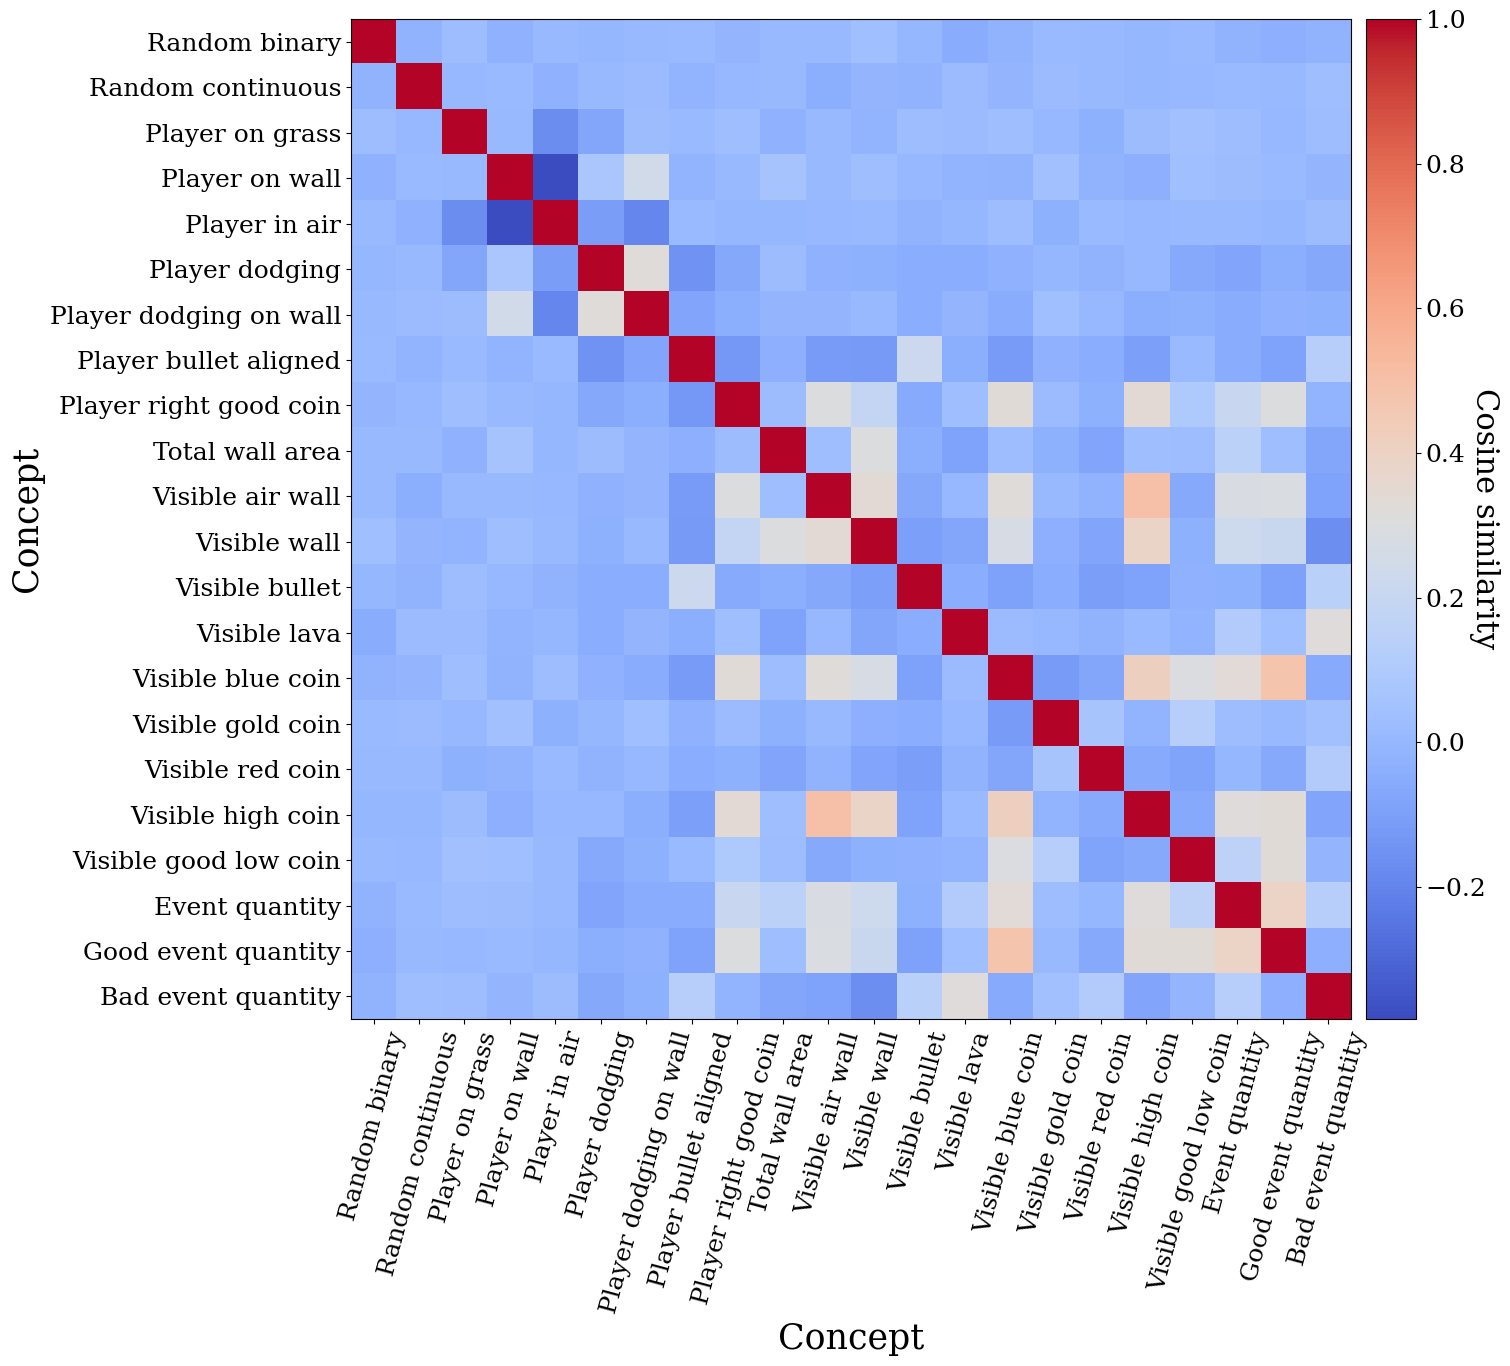

In [8]:
num_concepts = len(concept_cavs)
similarity_matrix = np.zeros((num_concepts, num_concepts))

# Populate the matrix
for i, concept1 in enumerate(concept_cavs):
    for j, concept2 in enumerate(concept_cavs):
        similarity_matrix[i, j] = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])

plt.figure(figsize=(18, 14))
plt.imshow(similarity_matrix, cmap='coolwarm')
# set x and y labels
plt.xlabel('Concept', fontsize=25)
plt.ylabel('Concept', fontsize=25)
cbar = plt.colorbar(pad=0.01)
cbar.set_label('Cosine similarity', rotation=270, labelpad=10, fontsize=22)
plt.xticks(np.arange(num_concepts), concept_cavs.keys(), rotation=75)
plt.yticks(np.arange(num_concepts), concept_cavs.keys())
plt.tight_layout()
plt.savefig('figures/concept discovery/concept similarity.png', bbox_inches='tight')
plt.show()

In [7]:
pairs_with_scores = []
for i, concept1 in enumerate(concept_cavs.keys()):
    for j, concept2 in enumerate(concept_cavs.keys()):
        if i < j:  # No duplicate pairs
            similarity = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])
            pairs_with_scores.append(((concept1, concept2), similarity))

# Sort pairs based on similarity
sorted_pairs = sorted(pairs_with_scores, key=lambda x: x[1], reverse=True)

# Extract top x and bottom x correlated concept pairs
x = 10
top_x_concepts = sorted_pairs[:x]
bottom_x_concepts = sorted_pairs[-x:]

print(f"Top {x} closest concepts:\n")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in top_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")

print(f"\nBottom {x} closest concepts:\n")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in bottom_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")

Top 10 closest concepts:

               Concept 1                 |                Concept 2                 |   Score   
----------------------------------------------------------------------------------------------------
            Visible air wall             |            Visible high coin             |   0.5012   |
           Visible blue coin             |           Good event quantity            |   0.4808   |
           Visible blue coin             |            Visible high coin             |   0.4131   |
             Event quantity              |           Good event quantity            |   0.3905   |
              Visible wall               |            Visible high coin             |   0.3867   |
            Visible air wall             |               Visible wall               |   0.3403   |
         Player right good coin          |            Visible high coin             |   0.3378   |
           Visible blue coin             |              Event quantity             